In [11]:
import os
import csv
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt



In [12]:
os.chdir("/home/starcat/Documenti/CSV_STK/CSV/") #path dove si trovano i file_CAMERA_CAMERA_CAMERA .csv
with open('AccessiAreaTarget-750.csv', 'r') as file_CAMERA: #al posto di CAMERE123_400 blablabla metti il nome del file_CAMERA che vuoi analizzare
    csv_reader = csv.DictReader(file_CAMERA)
    data_CAMERA = [row for row in csv_reader]

with open('AccessiBarcola-750.csv', 'r') as file_TELECOM: #al posto di CAMERE123_400 blablabla metti il nome del file_CAMERA che vuoi analizzare
    csv_reader = csv.DictReader(file_TELECOM)
    data_TELECOM = [row for row in csv_reader]

print(data_TELECOM)
len(data_CAMERA)
minimoContatto_telecom = 120 # TEMPO MINIMO RICHIESTO PER AVERE UN ACCESSO VALIDO ALLA GROUND STATION (secondi)

ORE_DI_OMBRA=0 # =1 se si vuole analizzare un .csv dell'ombra. Altrimenti se non si vuole fare

if ORE_DI_OMBRA == 1:
    with open('SatellitiUmbra_2mesi.csv', 'r') as data_OMBRA: #al posto di CAMERE123_400 blablabla metti il nome del file_UMBRA che vuoi analizzare
        csv_reader = csv.DictReader(data_OMBRA)
        data_OMBRA = [row for row in csv_reader]
    UA = np.zeros(len(data_TELECOM))
    for i in range(len(data_TELECOM)-5):
        try:
            Temp = float(data_OMBRA[i]["Duration (sec)"])
        except ValueError:
            pass
        UA[i] = Temp
    UA = UA[UA != 0]
    print(f"il massimo di ombra dura = {np.max(UA)}sec; il minimo = {np.min(UA)}sec; in media la durata dell'ombra è = {np.mean(UA)}sec")



[{'Access': '1', 'Start Time (UTCG)': '23 Jun 2024 11:25:09.334', 'Stop Time (UTCG)': '23 Jun 2024 11:27:29.737', 'Duration (sec)': '140.402'}, {'Access': '2', 'Start Time (UTCG)': '23 Jun 2024 13:09:21.259', 'Stop Time (UTCG)': '23 Jun 2024 13:12:42.923', 'Duration (sec)': '201.664'}, {'Access': '3', 'Start Time (UTCG)': '24 Jun 2024 08:55:21.680', 'Stop Time (UTCG)': '24 Jun 2024 08:58:43.814', 'Duration (sec)': '202.133'}, {'Access': '4', 'Start Time (UTCG)': '24 Jun 2024 10:40:44.216', 'Stop Time (UTCG)': '24 Jun 2024 10:42:56.548', 'Duration (sec)': '132.332'}, {'Access': '5', 'Start Time (UTCG)': '24 Jun 2024 12:25:07.181', 'Stop Time (UTCG)': '24 Jun 2024 12:28:18.936', 'Duration (sec)': '191.755'}, {'Access': '6', 'Start Time (UTCG)': '25 Jun 2024 08:11:15.988', 'Stop Time (UTCG)': '25 Jun 2024 08:14:19.442', 'Duration (sec)': '183.454'}, {'Access': '7', 'Start Time (UTCG)': '25 Jun 2024 09:56:02.974', 'Stop Time (UTCG)': '25 Jun 2024 09:58:41.099', 'Duration (sec)': '158.124'}

In [13]:

def convert_to_seconds(date_string): #data in secondi
    date_format = "%d %b %Y %H:%M:%S.%f"
    parsed_date = datetime.strptime(date_string, date_format)
    seconds = parsed_date.timestamp()
    return seconds

def ripulisciDurata_dizC(diz): #rimuove dal .csv le righe che non contengono le informazioni richieste
    k=0
    for i in range(len(diz)):
        a=123456
        try:
            data_CAMERA[k]["Start Time (UTCG)"] = str(convert_to_seconds(data_CAMERA[k]["Start Time (UTCG)"]))
        except ValueError:
            pass
        try:
            data_CAMERA[k]["Stop Time (UTCG)"] = str(convert_to_seconds(data_CAMERA[k]["Stop Time (UTCG)"]))
        except ValueError:
            pass
        try:
            a = float(diz[k]["Duration (sec)"])
        except ValueError:
            pass
        if a < 60.0 and int(data_CAMERA[k]["Access"]) != 1 : # a < 10 = richiediamo che il tempo di accesso all'area target sia > 10
            del diz[k]
            k -= 1
        k += 1

def ripulisciValid_dizC(diz): #rimuove righe non valide
    k = 0
    for i in range(len(diz)):
        if (str(diz[k]["Duration (sec)"]) == "Duration (sec)") or (str(diz[k]["Access"]) == "Min Duration") or (str(diz[k]["Access"]) == "Max Duration") or (str(diz[k]["Access"]) == "Mean Duration") or (str(diz[k]["Access"]) == "Total Duration"):
            del diz[k]
            k -= 1
        k += 1

def ripulisciOrario_dizC(diz): #elimina tutti gli accessi che avvengano fuori dall'intervallo temporale richiesto
    k = 0
    C = convert_to_seconds("23 Jun 2024 00:00:00.000")
    for i in range(len(diz)):
        A = float(diz[k]["Start Time (UTCG)"])
        B = float(diz[k]["Stop Time (UTCG)"])
        if (5 < (A - C)%86400/3600 < 22) or (5 < (B - C)%86400/3600 < 22):
            del diz[k]
            k -= 1
        k += 1

def max_NumAccessiC(diz): #conta accessim
    max = int(0)
    for i in range(len(diz)):
        if int(data_CAMERA[i]["Access"]) > max:
            max = int(data_CAMERA[i]["Access"])
    return max

#le funzioni per le telecomunicazioni sono uguali a quelle per la camera, invece di finire in "C" finiscono in "T" e.g. ripulisciDurata_dizC ---> ripulisciDurata_dizT

def ripulisciDurata_dizT(diz): 
    k=0
    for i in range(len(diz)):
        a=123456
        try:
            data_TELECOM[k]["Start Time (UTCG)"] = str(convert_to_seconds(data_TELECOM[k]["Start Time (UTCG)"]))
        except ValueError:
            pass
        try:
            data_TELECOM[k]["Stop Time (UTCG)"] = str(convert_to_seconds(data_TELECOM[k]["Stop Time (UTCG)"]))
        except ValueError:
            pass
        try:
            a = float(diz[k]["Duration (sec)"])
        except ValueError:
            pass
        if a < minimoContatto_telecom and int(data_TELECOM[k]["Access"]) != 1:
            del diz[k]
            k -= 1
        k += 1

def ripulisciValid_dizT(diz):
    k = 0
    for i in range(len(diz)):
        if (str(diz[k]["Duration (sec)"]) == "Duration (sec)") or (str(diz[k]["Access"]) == "Min Duration") or (str(diz[k]["Access"]) == "Max Duration") or (str(diz[k]["Access"]) == "Mean Duration") or (str(diz[k]["Access"]) == "Total Duration"):
            del diz[k]
            k -= 1
        k += 1

def ripulisciOrario_dizT(diz):
    k = 0
    C = convert_to_seconds("23 Jun 2024 00:00:00.000")
    for i in range(len(diz)):
        A = float(diz[k]["Start Time (UTCG)"])
        B = float(diz[k]["Stop Time (UTCG)"])
        if (5 < (A - C)%86400/3600 < 22) or (5 < (B - C)%86400/3600 < 22):
            del diz[k]
            k -= 1
        k += 1

def max_NumAccessiT(diz):
    max = int(0)
    for i in range(len(diz)):
        if int(data_TELECOM[i]["Access"]) > max:
            max = int(data_TELECOM[i]["Access"])
    return max



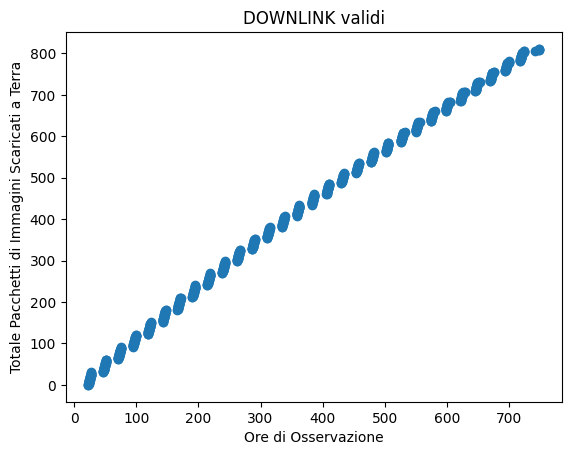

Numero di accessi validi complessivi in 1 mese: 812


In [14]:
########### RIPULISCI CSV CAMERA ############
ripulisciDurata_dizC(data_CAMERA)
ripulisciValid_dizC(data_CAMERA)
########### RIPULISCI CSV CAMERA ############




N_SAT = 30                                                                # numero satelliti
N_Max_StartAccess_CAMERA = max_NumAccessiC(data_CAMERA)                   # totale accessi camera a area target
START_ACC_CAMERA = np.zeros((N_SAT, N_Max_StartAccess_CAMERA))            # inizializzo vettore degli START ACCESS 
END_ACC_CAMERA = np.zeros((N_SAT, N_Max_StartAccess_CAMERA))              # inizializzo vettore degli STOP ACCESS
DURATION_ACC_CAMERA = np.zeros((N_SAT, N_Max_StartAccess_CAMERA))         # inizializzo vettore delle durate degli accessi
REVISIT_ACC_CAMERA = np.zeros(N_Max_StartAccess_CAMERA)                   # inizializzo vettore dei revisit time
minREVISIT_ACC_CAMERA = np.zeros((N_SAT, N_Max_StartAccess_CAMERA))       
m = np.zeros(N_SAT)
minREVISIT_Matrix_ACC_CAMERA = np.zeros((N_SAT,N_Max_StartAccess_CAMERA))


o = -1
for i in range(len(data_CAMERA)):
    if int(data_CAMERA[i]["Access"]) == 1: #ogni volta che la keyword Access == 1 significa che sta iniziando il conteggio degli accessi di un altro satellite
        t = i
        o += 1
    START_ACC_CAMERA[o][i-t] = float(data_CAMERA[i]["Start Time (UTCG)"]) # o-esimo satellite ha start time al passaggio i-t
    END_ACC_CAMERA[o][i-t] = float(data_CAMERA[i]["Stop Time (UTCG)"])    # o-esimo satellite ha stop time al passaggio i-t

#print(START_ACC_CAMERA[1])
# DURATION_ACC_CAMERA = END_ACC_CAMERA - START_ACC_CAMERA

#creaAccessi(data_CAMERA, 30)


########### RIPULISCI CSV TELECOM ############
ripulisciDurata_dizT(data_TELECOM)
ripulisciValid_dizT(data_TELECOM)
########### RIPULISCI CSV TELECOM ############


################## uguale alle operazioni fatte per CAMERA ##################
N_SAT = 30
N_Max_StartAccess_TELECOM = max_NumAccessiT(data_TELECOM)
START_ACC_TELECOM = np.zeros((N_SAT, N_Max_StartAccess_TELECOM))
END_ACC_TELECOM = np.zeros((N_SAT, N_Max_StartAccess_TELECOM))
DURATION_ACC_TELECOM = np.zeros((N_SAT, N_Max_StartAccess_TELECOM))
REVISIT_ACC_TELECOM = np.zeros(N_Max_StartAccess_TELECOM)
minREVISIT_ACC_TELECOM = np.zeros((N_SAT, N_Max_StartAccess_TELECOM))
m = np.zeros(N_SAT)
minREVISIT_Matrix_ACC_TELECOM = np.zeros((N_SAT,N_Max_StartAccess_TELECOM))



o = -1
for i in range(len(data_TELECOM)):
    if int(data_TELECOM[i]["Access"]) == 1:
        t = i
        o += 1
    START_ACC_TELECOM[o][i-t] = float(data_TELECOM[i]["Start Time (UTCG)"]) # o-esimo satellite ha start time al passaggio i-t
    END_ACC_TELECOM[o][i-t] = float(data_TELECOM[i]["Stop Time (UTCG)"])

################## uguale alle operazioni fatte per CAMERA ##################





START_ACC_CAMERA_copy = np.copy(START_ACC_CAMERA) #vettore di supporto

C = convert_to_seconds("23 Jun 2024 00:00:00.000")

### CICLO PER CONTEGGIARE GLI ACCESSI VALIDI AD AREA TARGET IMMEDIATAMENTE SEGUITI DA ACCESSO VALIDO A GROUND BASE ###
#in pratica creo un vettore maschera per mettere a 0 tutti le entries non valide, poi rimuovo gli 0 dal vettore
for o in range(N_SAT):
    for i in range(N_Max_StartAccess_CAMERA-1):
        for j in range(N_Max_StartAccess_TELECOM-1):
            if START_ACC_CAMERA[o][i] < START_ACC_TELECOM[o][j] < START_ACC_CAMERA[o][i+1] < START_ACC_TELECOM[o][j+1]: #se accesso seguito da telecom
                if ((START_ACC_CAMERA[o][i]-C)%86400/3600 < 5.) or ((22. < (START_ACC_CAMERA[o][i]-C)%86400/3600)):     #l'accesso ad area target deve essere fatto all'orario giusto
                    #print(((START_ACC_CAMERA[o][i]-C)%86400)/3600)
                    START_ACC_CAMERA_copy[o][i]=0

START_ACC_CAMERA_copy = START_ACC_CAMERA - START_ACC_CAMERA_copy 
### CICLO PER CONTEGGIARE GLI ACCESSI VALIDI AD AREA TARGET IMMEDIATAMENTE SEGUITI DA ACCESSO VALIDO A GROUND BASE ###


finale = []
TOTALE = 0
for o in range(N_SAT):
    for i in range(len(START_ACC_CAMERA_copy[o])-4):
        if START_ACC_CAMERA_copy[o][i] != 0:
            finale.append((START_ACC_CAMERA_copy[o][i]-C)/3600) # /3600 per riportare i dati in ore invece che in secondi
            TOTALE += 1


finale = np.asarray(finale)
finale = np.sort(finale)
#print(finale)
plt.scatter((finale), range(len(finale)))
plt.title("DOWNLINK validi")
plt.xlabel("Ore di Osservazione")
plt.ylabel("Totale Pacchetti di Immagini Scaricati a Terra")
#plt.xlim(47,48)
#plt.ylim(0, 50)
plt.show()
#print(START_ACC_CAMERA_copy[0])


print(f"Numero di accessi validi complessivi in 1 mese: {len(finale)}")



[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

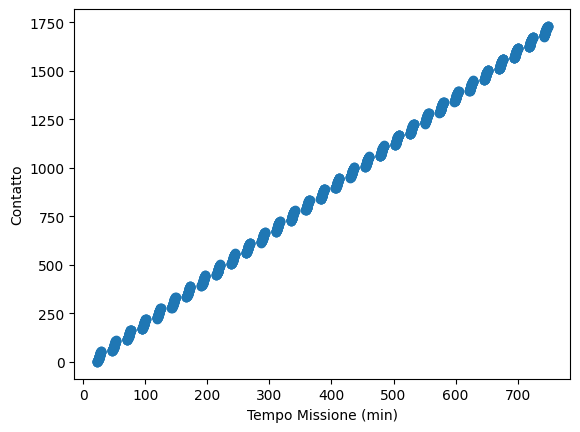

1733


In [15]:

################ CIAO! SONO LA VOCE DELLA CELLA JUPYTER CHE STAI GUARDANDO! IGNORAMI!!! #################















# SE SI ESEGUE QUESTO BLOCCO IL BLOCCO PRECEDENTE NON PUO' ESSERE RI-ESEGUITO SENZA RESTARTARE TUTTO #


# print(np.mean(minREVISIT_ACC_CAMERA[:]))
# plt.plot(minREVISIT_ACC_CAMERA[:])
# plt.xlabel("orbita")
# plt.ylabel("revisit")
# plt.show()
ripulisciDurata_dizC(data_CAMERA)
ripulisciValid_dizC(data_CAMERA)
ripulisciOrario_dizC(data_CAMERA)
lista_Transiti_CAMERA = np.zeros(len(data_CAMERA))
print(START_ACC_CAMERA_copy[0])
print("AB")
for i in range(len(data_CAMERA)):
    lista_Transiti_CAMERA[i] = data_CAMERA[i]["Start Time (UTCG)"]
print("UGA")
C = convert_to_seconds("23 Jun 2024 00:00:00.000")
listaOrdinata_Transiti_CAMERA = np.sort(lista_Transiti_CAMERA)
differenza_Transiti_CAMERA = np.diff(listaOrdinata_Transiti_CAMERA)
differenza_Transiti_CAMERA = differenza_Transiti_CAMERA[differenza_Transiti_CAMERA != 0]
mask = np.zeros(len(listaOrdinata_Transiti_CAMERA))+1
np.mean(differenza_Transiti_CAMERA)
print(len(differenza_Transiti_CAMERA))
plt.scatter((listaOrdinata_Transiti_CAMERA-C)/(86400)*24, range(len(listaOrdinata_Transiti_CAMERA)))
plt.xlabel("Tempo Missione (min)")
plt.ylabel("Contatto")
#plt.xlim(19.0*24, 19.1*24)
plt.show()

print(len(listaOrdinata_Transiti_CAMERA))
